Analysis of the world's billionaires in Python

In [469]:
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt

In [470]:
df = pd.read_csv('input/Billionaire.csv')

In [471]:
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [472]:
df.shape

(2755, 7)

## Preprocessing

Remove null values

In [473]:
df.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [474]:
df = df.dropna()

In [475]:
df.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

Convert data from string type to numeric type (float)

In [476]:
df['NetWorth'] = df['NetWorth'].str.strip('$')
df['NetWorth'] = df['NetWorth'].str.strip('B')
df['NetWorth'] = df['NetWorth'].astype(float)

C:\Users\USER\AppData\Local\Temp\ipykernel_15604\2136733961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NetWorth'] = df['NetWorth'].str.strip('$')
C:\Users\USER\AppData\Local\Temp\ipykernel_15604\2136733961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NetWorth'] = df['NetWorth'].str.strip('B')
C:\Users\USER\AppData\Local\Temp\ipykernel_15604\2136733961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [477]:
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


## Exploratory Data Analysis (EDA)

Top 10 Rich

In [478]:
df_sorted = df.sort_values('NetWorth', ascending=False).head(10)
df_sorted

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


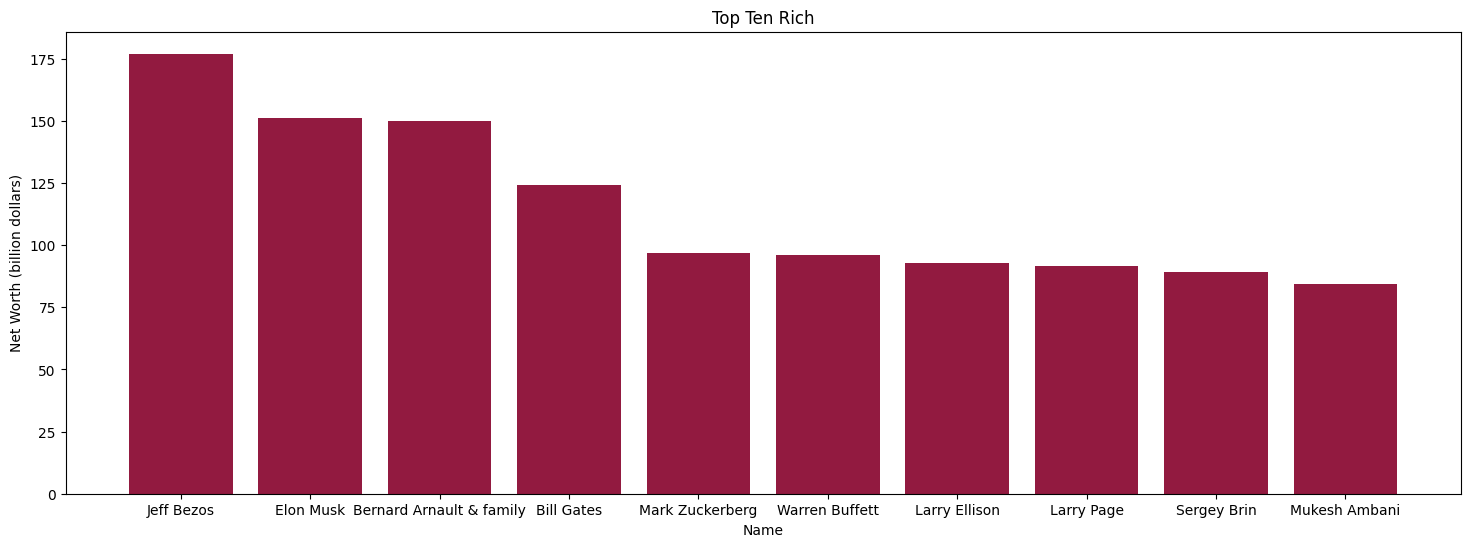

In [479]:
plt.figure(figsize=(18, 6))
plt.bar(df_sorted['Name'], df_sorted['NetWorth'] , color='#921A40')
plt.title('Top Ten Rich')
plt.xlabel('Name')
plt.ylabel('Net Worth (billion dollars)')
plt.show()

Top 10 Damain to become a Bilionaires

In [480]:
df_sourced = df['Source'].value_counts().head(10).reset_index()
df_sourced

,Source,count
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


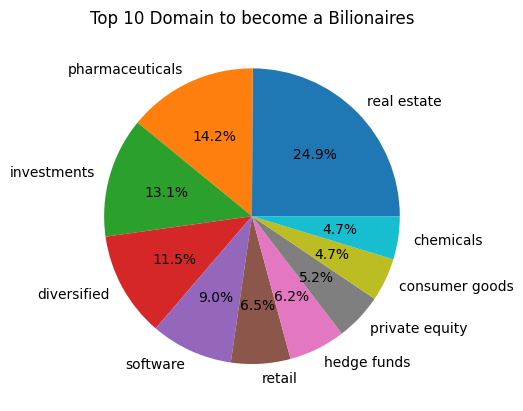

In [481]:
plt.pie(df_sourced['count'] , labels=df_sourced['Source'] , autopct='%1.1f%%')
plt.title('Top 10 Domain to become a Bilionaires')
plt.show()

Top 10 Industry to become a Bilionaires

In [482]:
industry_counts = df['Industry'].value_counts().reset_index()
industry_counts

,Industry,count
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


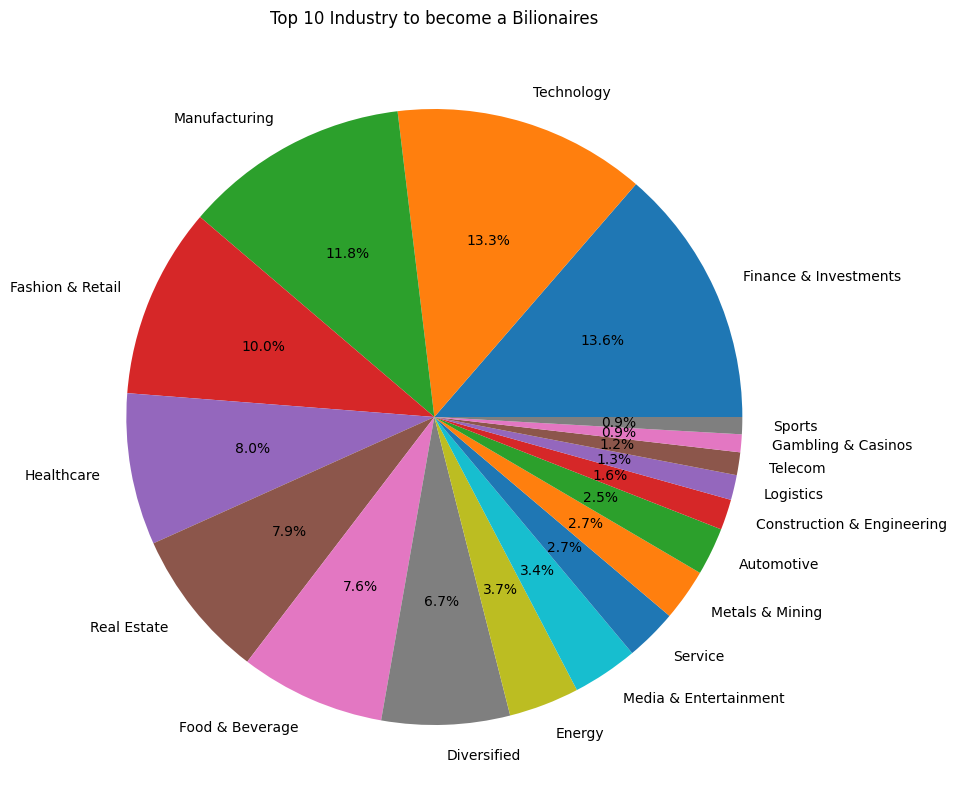

In [483]:
plt.figure(figsize=(18, 10))
plt.pie(industry_counts['count'] , labels=industry_counts['Industry'] , autopct='%1.1f%%')
plt.title('Top 10 Industry to become a Bilionaires')
plt.show()

Top 10 Rich Country

In [484]:
top_ten_countries = df['Country'].value_counts().head(10).reset_index()
top_ten_countries

,Country,count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115
5,Hong Kong,68
6,Brazil,61
7,Canada,60
8,United Kingdom,54
9,Italy,49


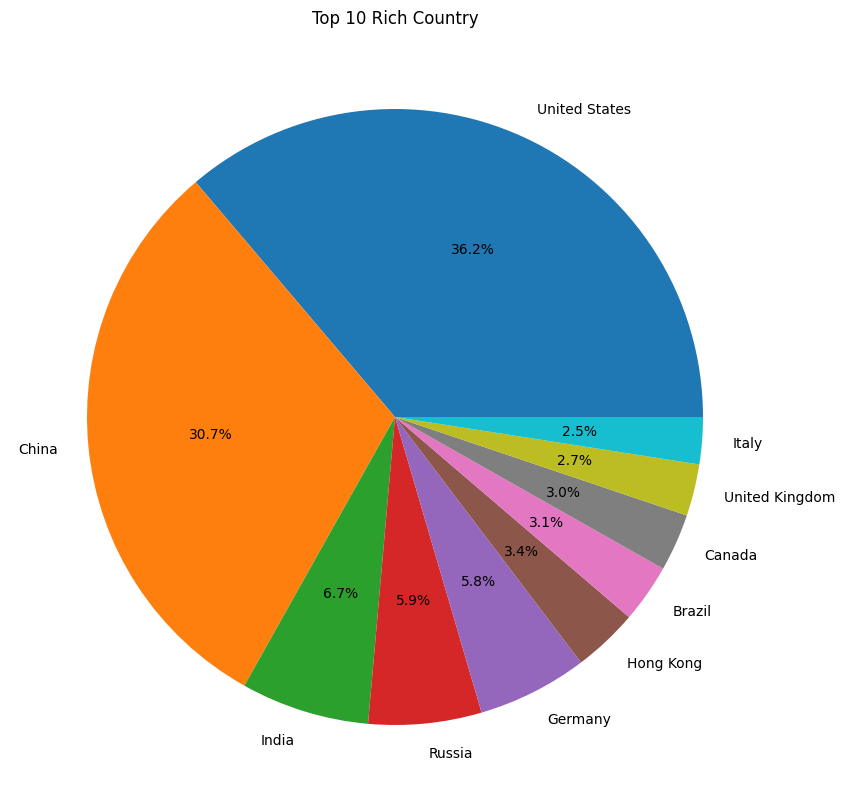

In [485]:
plt.figure(figsize=(18, 10))
plt.pie(top_ten_countries['count'] , labels=top_ten_countries['Country'] , autopct='%1.1f%%')
plt.title('Top 10 Rich Country')
plt.show()

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2676 non-null   object 
 1   NetWorth  2676 non-null   float64
 2   Country   2676 non-null   object 
 3   Source    2676 non-null   object 
 4   Rank      2676 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2676 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 167.2+ KB


Sorted by Wealth

In [487]:
df_sorted = df.sort_values(by="NetWorth", ascending=False)
df_sorted

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2698,Ashok Kajaria,1.0,India,tiles,2674,73.0,Manufacturing
2697,Morris Kahn,1.0,Israel,software,2674,91.0,Technology
2696,Jiang Long,1.0,China,Manufacturing,2674,47.0,Technology
2695,Hur Young-in,1.0,South Korea,"bakeries, fast food",2674,71.0,Food & Beverage


Mean and Variance of Age

In [488]:
mean_age = df_sorted['Age'].mean()
print("Average Age:", mean_age)

Average Age: 63.1136023916293


In [489]:
variance_age = df_sorted['Age'].var()
print("Variance of Age:", variance_age)

Variance of Age: 180.77213640110082


Calculate the total wealth of each country

In [490]:
country_networth = df.groupby('Country')['NetWorth'].sum()
country_networth

Country
Algeria              4.8
Argentina            9.2
Australia          176.7
Austria             62.7
Belgium             12.6
                   ...  
United Kingdom     196.5
United States     4384.7
Venezuela            3.2
Vietnam             16.7
Zimbabwe             1.5
Name: NetWorth, Length: 70, dtype: float64

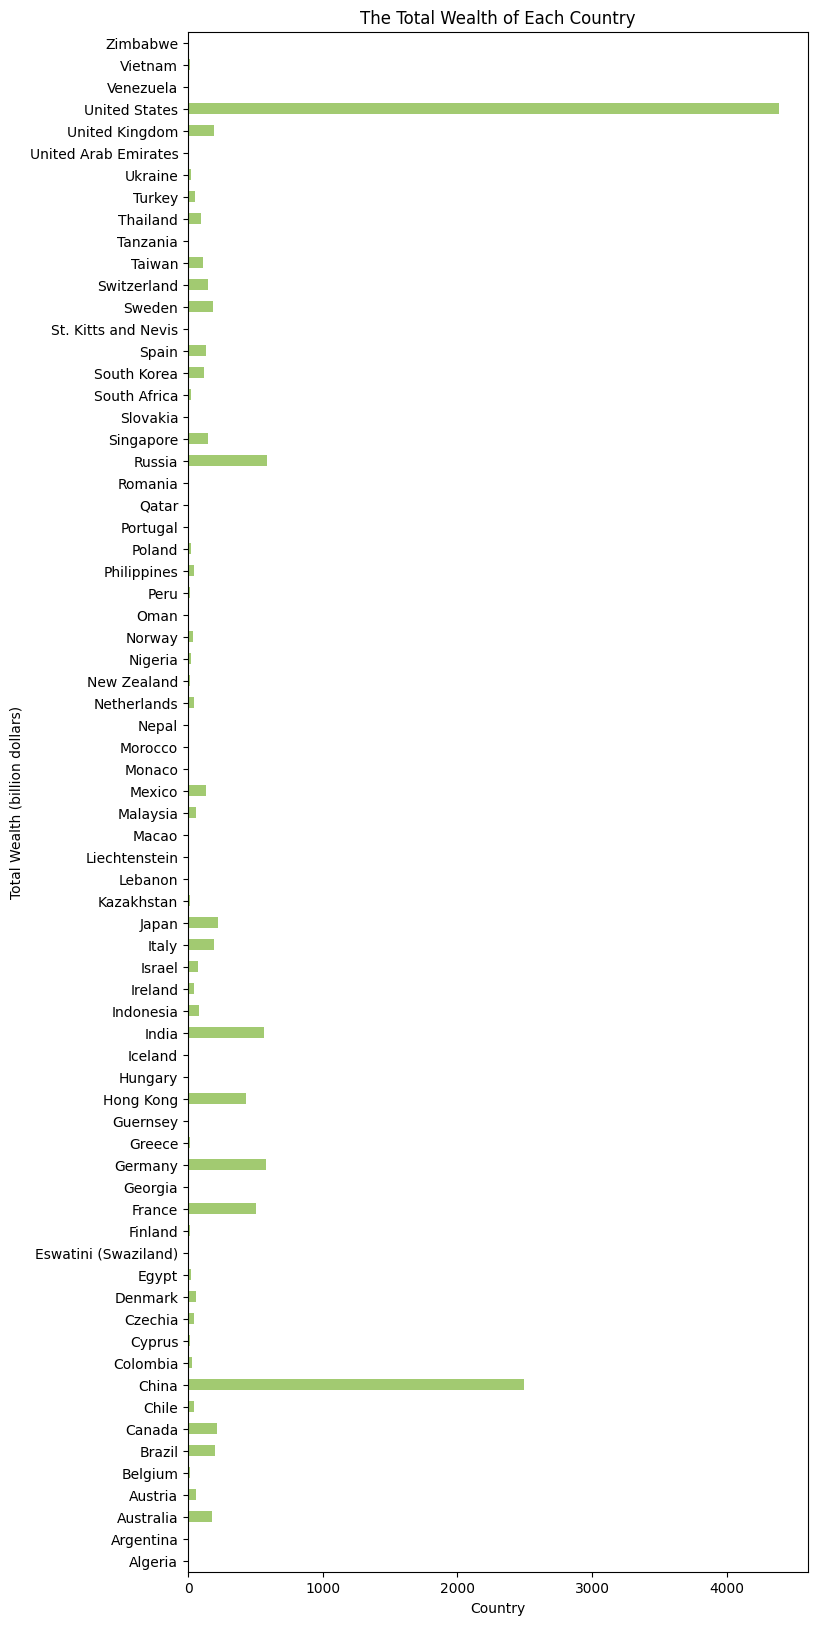

In [491]:
plt.figure(figsize=(8, 20))
country_networth.plot(kind='barh' , color='#A2CA71')
plt.title('The Total Wealth of Each Country')
plt.xlabel('Country')
plt.ylabel('Total Wealth (billion dollars)')
plt.show()

The Top 10 Richest Americans

In [492]:
us_citizens = df[df['Country'] == 'United States'].reset_index(drop=True)
us_citizens

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
...,...,...,...,...,...,...,...
715,Vlad Tenev,1.0,United States,stock trading,2674,34.0,Finance & Investments
716,Vlad Vendrow & family,1.0,United States,software,2674,53.0,Technology
717,J. Wayne Weaver,1.0,United States,Shoes,2674,85.0,Diversified
718,Sandy Weill,1.0,United States,Citigroup,2674,88.0,Finance & Investments


In [493]:
top_ten_us = us_citizens.sort_values(by='NetWorth', ascending=False).head(10)
top_ten_us

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
5,Larry Ellison,93.0,United States,software,7,76.0,Technology
6,Larry Page,91.5,United States,Google,8,48.0,Technology
7,Sergey Brin,89.0,United States,Google,9,47.0,Technology
8,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
9,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


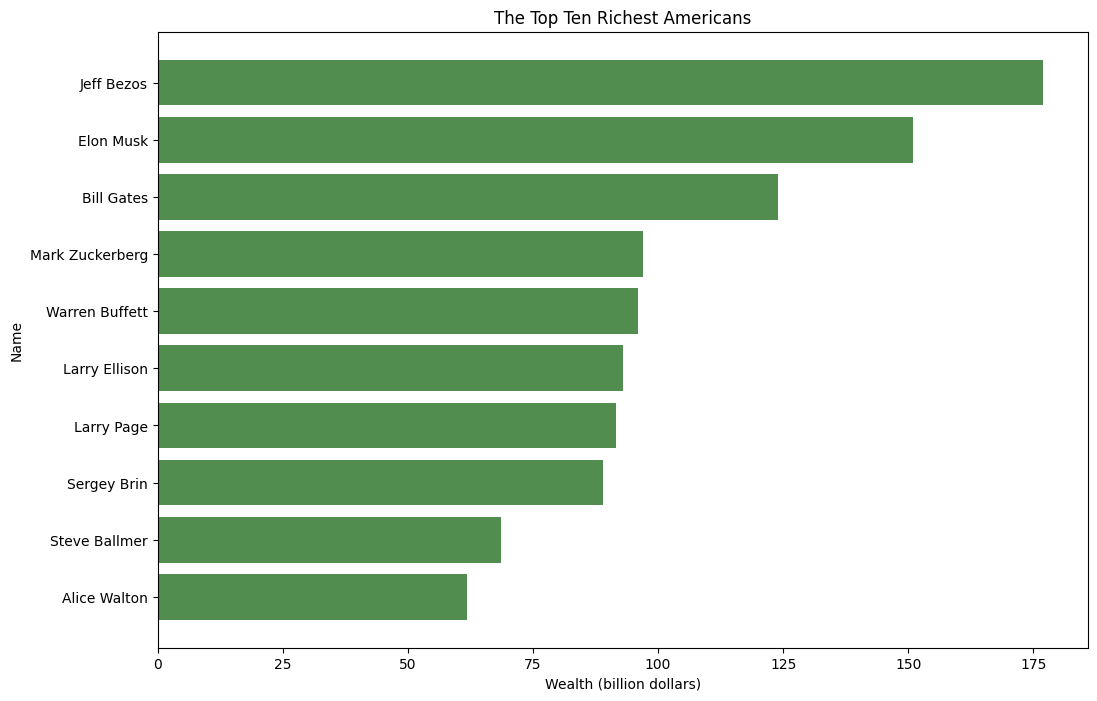

In [494]:
plt.figure(figsize=(12, 8))
plt.barh(top_ten_us['Name'], top_ten_us['NetWorth'], color='#508D4E')
plt.xlabel('Wealth (billion dollars)')
plt.ylabel('Name')
plt.title('The Top Ten Richest Americans')
plt.gca().invert_yaxis()
plt.show()

10 Countries With the Least Wealth

In [495]:
bottom_ten_countries = df.groupby('Country')['NetWorth'].sum().reset_index().sort_values(by="NetWorth", ascending=True).head(10)
bottom_ten_countries.columns = ['Country', 'NetWorth']
bottom_ten_countries

,Country,NetWorth
38,Nepal,1.4
69,Zimbabwe,1.5
60,Tanzania,1.6
56,St. Kitts and Nevis,1.6
43,Oman,2.3
64,United Arab Emirates,2.4
20,Guernsey,2.6
22,Hungary,2.7
52,Slovakia,2.9
48,Qatar,2.9


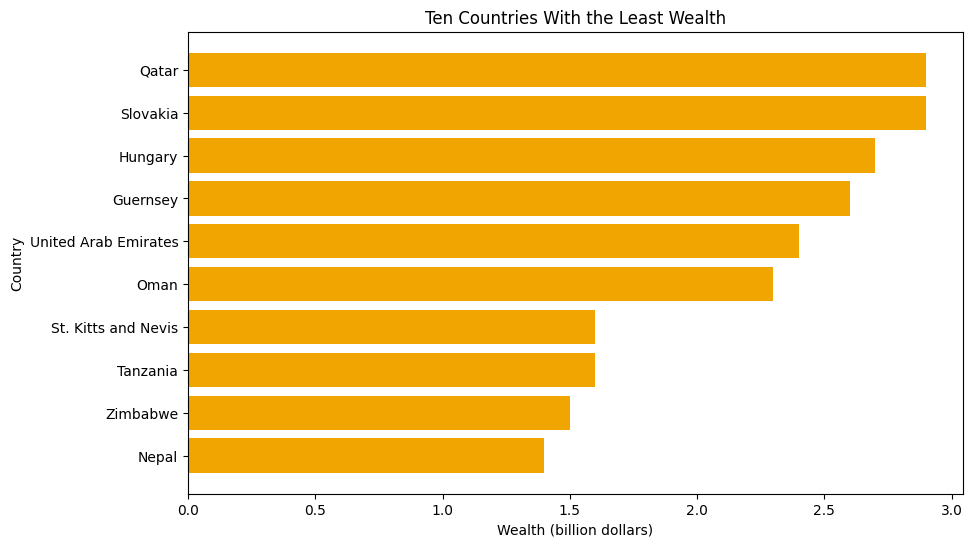

In [496]:
plt.figure(figsize=(10, 6))
plt.barh(bottom_ten_countries['Country'], bottom_ten_countries['NetWorth'] ,color='#F0A500')
plt.xlabel('Wealth (billion dollars)')
plt.ylabel('Country')
plt.title('Ten Countries With the Least Wealth')
plt.show()